In [1]:
%%time
import malaya

CPU times: user 5.07 s, sys: 1.33 s, total: 6.4 s
Wall time: 8.1 s


In [2]:
string1 = 'Pemuda mogok lapar desak kerajaan prihatin isu iklim'
string2 = 'Perbincangan isu pembalakan perlu babit kerajaan negeri'
string3 = 'kerajaan perlu kisah isu iklim, pemuda mogok lapar'
string4 = 'Kerajaan dicadang tubuh jawatankuasa khas tangani isu alam sekitar'

## Calculate similarity using doc2vec

We can use any word vector interface provided by Malaya to use doc2vec similarity interface.

Important parameters,
1. `aggregation`, aggregation function to accumulate word vectors. Default is `mean`.

    * ``'mean'`` - mean.
    * ``'min'`` - min.
    * ``'max'`` - max.
    * ``'sum'`` - sum.
    * ``'sqrt'`` - square root.
   
2. `similarity` distance function to calculate similarity. Default is `cosine`.

    * ``'cosine'`` - cosine similarity.
    * ``'euclidean'`` - euclidean similarity.
    * ``'manhattan'`` - manhattan similarity.

#### Using word2vec

I will use `load_news`, word2vec from wikipedia took a very long time. wikipedia much more accurate.

In [5]:
vocab_news, embedded_news = malaya.wordvector.load_news()
w2v = malaya.wordvector.load(embedded_news, vocab_news)
doc2vec = malaya.similarity.doc2vec(w2v)

#### predict for 2 strings

In [7]:
doc2vec.predict_proba([string1], [string2], aggregation = 'mean', soft = False)

array([0.899711], dtype=float32)

#### predict batch of strings

In [8]:
doc2vec.predict_proba([string1, string2], [string3, string4])

array([0.9215344, 0.853461 ], dtype=float32)

#### visualize tree plot

<Figure size 504x504 with 0 Axes>

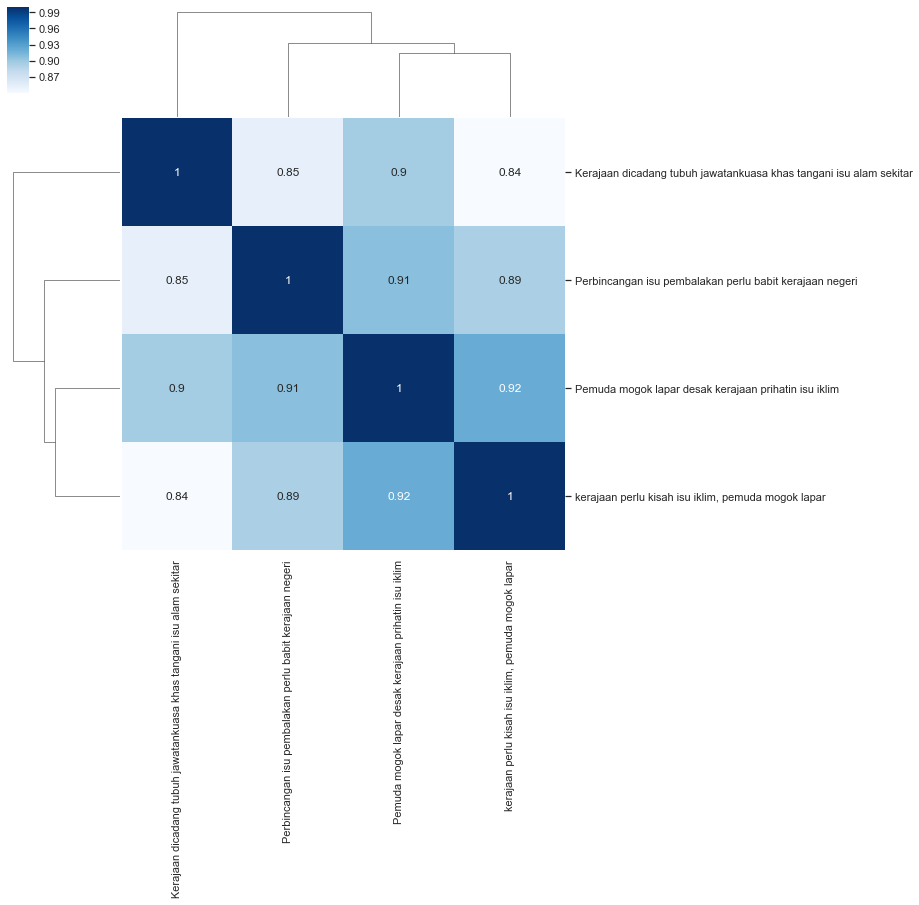

In [10]:
doc2vec.tree_plot([string1, string2, string3, string4])

Different similarity function different percentage.

## Calculate similarity using deep encoder

We can use any encoder models provided by Malaya to use encoder similarity interface, example, BERT, XLNET, and skip-thought. Again, these encoder models not trained to do similarity classification, it just encode the strings into vector representation.

Important parameters,
   
1. `similarity` distance function to calculate similarity. Default is `cosine`.

    * ``'cosine'`` - cosine similarity.
    * ``'euclidean'`` - euclidean similarity.
    * ``'manhattan'`` - manhattan similarity.

#### using xlnet

In [11]:
xlnet = malaya.transformer.load(model = 'xlnet')
encoder = malaya.similarity.encoder(xlnet)





INFO:tensorflow:memory input None
INFO:tensorflow:Use float type <dtype: 'float32'>

Instructions for updating:
Use keras.layers.dropout instead.
Instructions for updating:
Please use `layer.__call__` method instead.
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.Dense instead.




INFO:tensorflow:Restoring parameters from /Users/huseinzolkepli/Malaya/xlnet-model/base/xlnet-base/model.ckpt


#### predict for 2 strings

In [12]:
encoder.predict_proba([string1], [string2])

array([0.824718], dtype=float32)

#### predict batch of strings

In [13]:
encoder.predict_proba([string1, string2], [string3, string4])

array([0.59171796, 0.56186515], dtype=float32)

#### visualize tree plot

<Figure size 504x504 with 0 Axes>

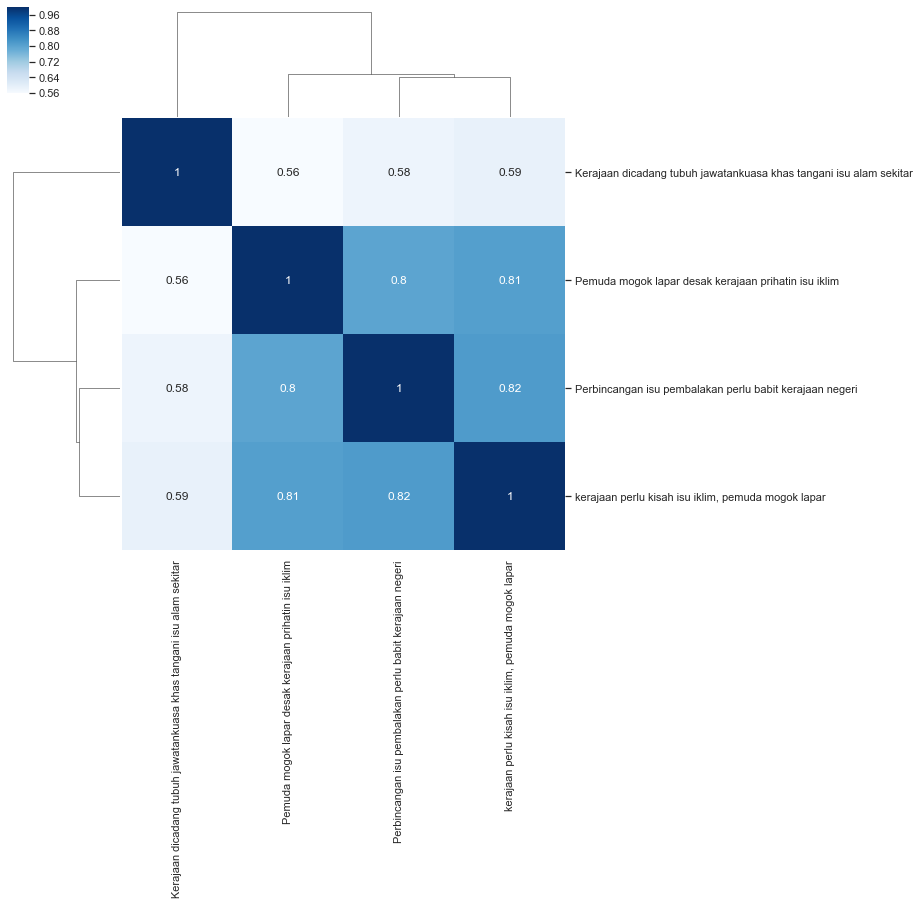

In [14]:
encoder.tree_plot([string1, string2, string3, string4])

## List available Transformer models

In [15]:
malaya.similarity.available_transformer_model()

{'bert': ['423.4 MB', 'accuracy: 0.912'],
 'tiny-bert': ['56.6 MB', 'accuracy: 0.902'],
 'albert': ['46.3 MB', 'accuracy: 0.902'],
 'tiny-albert': ['21.9 MB', 'accuracy: 0.868'],
 'xlnet': ['448.7 MB', 'accuracy: 0.856'],
 'alxlnet': ['49.0 MB', 'accuracy: 0.910']}

Make sure you can check accuracy chart from here first before select a model, https://malaya.readthedocs.io/en/latest/Accuracy.html#similarity

**You might want to use ALXLNET, a very small size, 49MB, but the accuracy is still on the top notch.**

In [16]:
model = malaya.similarity.transformer(model = 'alxlnet')

#### predict batch

you need to give list of left strings, and list of right strings.

first left string will compare will first right string and so on.

In [17]:
model.predict_proba([string1, string2], [string3, string4])

array([0.9988274 , 0.04958355], dtype=float32)